In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


drive.mount("/content/drive/")
pacientes=pd.read_csv("drive/MyDrive/lung_cancer_dataset.csv")
pacientes

Mounted at /content/drive/


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
49995,149995,81,Female,9.386431,Medium,No,Yes,No,Moderate,No,Yes
49996,149996,28,Male,99.471718,Medium,No,Yes,No,Moderate,No,Yes
49997,149997,90,Male,14.349722,Low,Yes,Yes,No,Heavy,Yes,Yes
49998,149998,33,Female,87.012555,Medium,No,No,Yes,Moderate,No,No


In [ ]:
pacientes["alcohol_consumption"]=pacientes["alcohol_consumption"].fillna("None")
pacientes=pacientes.drop("patient_id", axis=1)
pacientes

,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,89,Female,0.408278,Medium,Yes,Yes,Yes,None,No,Yes
3,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,38,Female,44.432440,Medium,Yes,No,Yes,None,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
49995,81,Female,9.386431,Medium,No,Yes,No,Moderate,No,Yes
49996,28,Male,99.471718,Medium,No,Yes,No,Moderate,No,Yes
49997,90,Male,14.349722,Low,Yes,Yes,No,Heavy,Yes,Yes
49998,33,Female,87.012555,Medium,No,No,Yes,Moderate,No,No


In [ ]:
pacientes.dtypes

,0
age,int64
gender,object
pack_years,float64
radon_exposure,object
asbestos_exposure,object
secondhand_smoke_exposure,object
copd_diagnosis,object
alcohol_consumption,object
family_history,object
lung_cancer,object


In [ ]:
for i in pacientes.columns:
    if pacientes[i].dtype == 'object':
        pacientes[i] = LabelEncoder().fit_transform(pacientes[i])

In [ ]:
pacientes

,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,69,1,66.025244,0,0,0,1,1,0,0
1,32,0,12.780800,0,0,1,1,1,1,1
2,89,0,0.408278,2,1,1,1,2,0,1
3,78,0,44.065232,1,0,1,0,1,0,1
4,38,0,44.432440,2,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,81,0,9.386431,2,0,1,0,1,0,1
49996,28,1,99.471718,2,0,1,0,1,0,1
49997,90,1,14.349722,1,1,1,0,0,1,1
49998,33,0,87.012555,2,0,0,1,1,0,0


In [ ]:
x = pacientes[["age", "gender", "pack_years", "radon_exposure", "asbestos_exposure", "secondhand_smoke_exposure", "copd_diagnosis", "alcohol_consumption", "family_history"]]
y = pacientes["lung_cancer"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
clasificador=RandomForestClassifier(n_estimators=100, criterion="gini", max_features="sqrt", bootstrap=True, oob_score=True)
clasificador.fit(x_train, y_train)
prediccion = clasificador.predict(x_test)

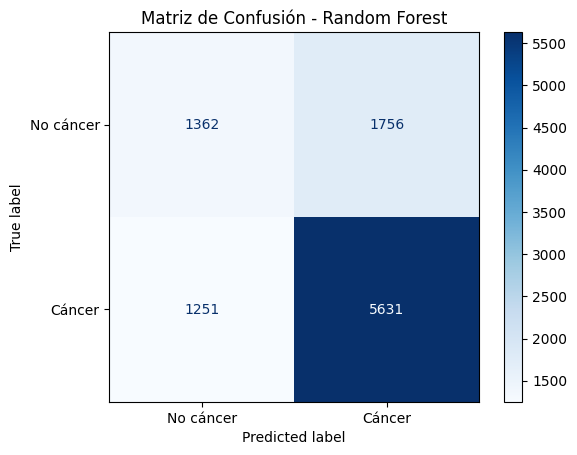

In [ ]:
matriz = confusion_matrix(y_test, prediccion)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["No cáncer", "Cáncer"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Random Forest")
plt.show()